# Tasks

Tasks are the basis of this library. A task is just a pair of a DatasetLoader and TrainableModel. Currently,
we only support "ClassificationTask"s. 
You create one using a TaskBuilder, ensuring to add a model and dataset loader:

In [28]:
from rocelib.datasets.ExampleDatasets import get_example_dataset
from rocelib.tasks.TaskBuilder import TaskBuilder
# Get your dataset
dl = get_example_dataset("ionosphere")

# Using a simple neural net from RoCELib
You can use a simple neural network which is created and trained within our library. We support Pytorch, Keras and Sklearn models:

In [29]:
#Pytorch Model
ct = TaskBuilder().add_pytorch_model(34, [8], 1, dl).add_data(dl).build()

#Keras Model
# ct = TaskBuilder().add_keras_model(34, [8], 1, dl).add_data(dl).build()

#Sklearn Model
#For sklearn instead of passing in the model dimension, you pass the model type:
#"decision tree", "logistic regression" or "svm":
ct = TaskBuilder().add_sklearn_model("decision tree", dl).add_data(dl).build()

The default task type is a classification task but you can adjust this using the TaskBuilder's ```set_task_type``` function

# Importing your own Model
You can import your own pretrained Pytorch, Keras or Sklearn model to use in our library for recourse generation/evaluation

# Importing a Pytorch Model

To import a .pt or .pth file:
You must save your entire model, rather than just the state dictionary i.e. do:
torch.save(model, "./model.pt”)
Rather than: torch.save(model.state_dict(), "./model.pt”)
To then load it into our library you can create a task using the ```add_model_from_path``` function:

In [30]:
ct = TaskBuilder().add_model_from_path("model.pt").add_data(dl).build()

/home/james/Documents/RoCELib/rocelib/models/imported_models/PytorchModel.py:29: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model = torch.load(model_path, map_locati

# Importing a Keras Model

Use the ```add_model_from_path()``` function, providing a .keras file

In [31]:
ct = TaskBuilder().add_model_from_path("model.keras").add_data(dl).build()

# Importing a Sklearn Model

Use the ```add_model_from_path()``` function, providing a .pkl file

In [32]:
ct = TaskBuilder().add_model_from_path("model.pkl").add_data(dl).build()

# Adding Mutliple Models to the Task (for Model Multiplicity Evaluation)
You can add multiple models to the task
Note that the main model will be the first model that you added to the task (i.e. this is the model that counterfactuals will be generated for when you call ```ct.generate```)

In [33]:
ct = (TaskBuilder()
      .add_pytorch_model(34, [8], 1, dl) #base model
      .add_keras_model(34, [8], 1, dl)
      .add_keras_model(34, [8], 1, dl).add_data(dl).build())


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - accuracy: 0.0000e+00 - loss: 0.7803
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.0000e+00 - loss: 0.7284
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.0000e+00 - loss: 0.6213
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 0.0000e+00 - loss: 0.6018
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.0000e+00 - loss: 0.5223
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.0000e+00 - loss: 0.5245
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.0000e+00 - loss: 0.4616
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.0000e+00 - loss: 0.4510
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.0000e+00 - loss: 0.4177
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.0000e+00 - loss: 0.4163
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.0000e+00 - loss: 0.38

# Naming the imported Models
You can optionally name your models when you import them. If you do not provide a name the library will generate a default name for the model e.g. "pytorch_model_1", "sklearn_model_1", "keras_model_1", "pytorch_model_2" etc.

In [34]:
ct = (TaskBuilder()
      .add_pytorch_model(34, [8], 1, dl, "my_model")
      .add_keras_model(34, [8], 1, dl)
      .add_keras_model(34, [8], 1, dl).add_data(dl).build())

print(ct.mm_models.keys())

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 0.0000e+00 - loss: 0.9276
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.8422 
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.0000e+00 - loss: 0.7527
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.0000e+00 - loss: 0.7004
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.0000e+00 - loss: 0.5939
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.0000e+00 - loss: 0.5959
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.0000e+00 - loss: 0.5632
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.0000e+00 - loss: 0.5278
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.0000e+00 - loss: 0.5151
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.0000e+00 - loss: 0.4657
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.0000e+00 - loss: 0.450

# Generating Counterfactuals for the Base Model
To generate counterfactuals, you use the `ct.generate` method, 
You can pass in the list of recourse methods you would like to generate counterfactuals for as well as any kwargs. (use `ct.get_recourse_methods()` to see all supported recourse methods)
If you do not provide a list of recourse methods, counterfactuals will be generated for all recourse methods
This will store the counterfactuals within the task for use when evaluating later and will also return them as a dictionary from recourse method to a tuple of (Pandas dataframe holding the counterfactual, time taken to generate the counterfactual)

In [35]:
ct.get_recourse_methods()

['BinaryLinearSearch',
 'MMMILP',
 'NNCE',
 'KDTreeNNCE',
 'MCE',
 'Wachter',
 'RNCE',
 'MCER',
 'RoCourseNet',
 'STCE',
 'APAS',
 'ArgEnsembling',
 'DiverseRobustCE',
 'PROPLACE']

In [36]:
#Generate counterfactuals for MCE and BinaryLinearSearch methods
ces = ct.generate(["MCE", "NNCE"])
print(ces)

Generating for MCE
Generating for NNCE
{'MCE': [     feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
1    -0.253677        0.0  -1.728409   0.026447  -0.500436   0.329400   
3    -0.247878        0.0  -1.721330   0.054407  -0.479880   0.229946   
5    -0.288192        0.0  -1.709737   0.000497  -0.397782   0.385600   
7    -0.226913        0.0  -1.677391  -0.001925  -0.441756   0.297557   
9    -0.265741        0.0  -1.699383   0.062193  -0.411213   0.325223   
..         ...        ...        ...        ...        ...        ...   
242  -0.257050        0.0  -1.720599   0.169860  -0.428986   0.332841   
244  -0.246670        0.0  -1.665601   0.073593  -0.521383   0.326563   
246  -0.264631        0.0  -1.681125   0.044784  -0.414112   0.342879   
250  -0.247261        0.0  -1.679606   0.046798  -0.432856   0.328324   
252  -0.260649        0.0  -1.655256   0.018876  -0.430629   0.348885   

     feature_6  feature_7  feature_8  feature_9  ...  feature_24  feature_2

In [37]:
#Generate counterfactuals for all recourse methods
# ces = ct.generate()

In [38]:
#An example with kwargs:
res = ct.generate(["BinaryLinearSearch"], column_name="HiringDecision")

Generating for BinaryLinearSearch


# Generate Counterfactuals for All Models
To generate counterfactuals for all models, you must have added multiple models to the task, else an error will be printed when you attempt to generate counterfactuals. Then you can use the `ct.generate_mm` method.
You can pass in the list of recourse methods you would like to generate counterfactuals for as well as any kwargs. (use `ct.get_recourse_methods()` to see all supported recourse methods)
If you do not provide a list of recourse methods, counterfactuals will be generated for all recourse methods
This will store the counterfactuals within the task for use when evaluating later and will also return them as a nested dictionary from recourse method to model name to a tuple of (Pandas dataframe holding the counterfactual, time taken to generate the counterfactual)

In [39]:
ct = TaskBuilder().add_pytorch_model(34, [8], 1, dl).add_keras_model(34, [8], 1, dl).add_data(dl).build() #Ensure your task has multiple models
ces = ct.generate_mm(["MCE", "NNCE"])
print(ces)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.0000e+00 - loss: 0.8500
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.0000e+00 - loss: 0.7943
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.0000e+00 - loss: 0.7429
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - accuracy: 0.0000e+00 - loss: 0.6691
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.0000e+00 - loss: 0.6639
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.0000e+00 - loss: 0.6185
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.6148 
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.5583 
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.0000e+00 - loss: 0.5562
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.5730 
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.4929 
E

# Generating Evaluation Benchmarking Metrics
To generate evaluation metrics, you can use the `ct.evaluate(methods, evaluations)` method, which will print the evaluation metrics in a table.
You can pass in the list of recourse methods you would like to evaluate and evaluation metrics you would like to use

It is important to note that you can only evaluate recourse methods that you have already called `ct.generate` for. 
If you have not already generated counterfactuals for recourse method X, and then try to evaluate X, the library will skip recourse method X and print a message telling you to generate counterfactuals for it first. See the below example

In [40]:
ct = TaskBuilder().add_pytorch_model(34, [8], 1, dl).add_keras_model(34, [8], 1, dl).add_data(dl).build() #Ensure your task has multiple models
ces = ct.generate(["NNCE"])
#We have not generated counterfactuals for MCE, so when we try to evaluate MCE the library will skip it and only evaluate NNCE
evals = ct.evaluate(methods=["MCE", "NNCE"], evaluations=["Distance"])

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.0000e+00 - loss: 0.8875
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.0000e+00 - loss: 0.8758
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.0000e+00 - loss: 0.7966
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.0000e+00 - loss: 0.7348
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - accuracy: 0.0000e+00 - loss: 0.7016
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.0000e+00 - loss: 0.6393
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.0000e+00 - loss: 0.6170
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.0000e+00 - loss: 0.5637
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.5358 
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.0000e+00 - loss: 0.5288
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.5062 

In [41]:
ces = ct.generate(["MCE"])
# Sicne we have generated for MCE, we can now evaluate for MCE
evals = ct.evaluate(methods=["MCE", "BinaryLinearSearch"], evaluations=["Distance"])

Generating for MCE
generate has not been called for ['BinaryLinearSearch'] so evaluations were not performed for these
Evaluation technique Distance
Method: MCE
Shape of CEs for MCE: (125, 34)
Final Shapes - df1: (125, 34), df2: (125, 34)

Evaluation Results:
+-------------------+------------+
| Recourse Method   |   Distance |
+===================+============+
| MCE               |    8.00845 |
+-------------------+------------+


If you do not provide the list of recourse methods, the library will evaluate all recourse methods that you have previously called `generate` on.
If you do not provide the list of evaluation metrics, the library will use all applicable evaluation metrics
To see all supported evaluation metrics, use `ct.get_evaluation_metrics` 

In [42]:
# ces = ct.generate()
# evals = ct.evaluate()

## Model Multiplicity Evaluation Metrics 
If you would like to evaluate model multiplicity robustness, you must have already called `ct.generate_mm` for all the recourse methods you wish to evaluate. Note: `ct.generate` will not suffice as that does not generate for all the stored models, you must call `ct.generate_mm`.  
If you have not already called `generate_mm` for recourse method X, and then try to evaluate MM for X, the library will skip recourse method X and print a message telling you to call `generate_mm` for it first. See the below example

In [43]:
ct = TaskBuilder().add_pytorch_model(34, [8], 1, dl).add_pytorch_model(34, [8], 1, dl).add_data(dl).build()

ces = ct.generate(["MCE"])
ces = ct.generate_mm(["NNCE"])
# Note we have not called generate_mm for MCE (generate does not count as that does not generate for all stored models)

# We have not generated counterfactuals for MCE, so when we try to evaluate MCE the library will skip it and only evaluate NNCE (as we have called generate_MM for NNCE)
evals = ct.evaluate(methods=["MCE", "NNCE"], evaluations=["Distance"])

Generating for MCE
Generating for NNCE
GENERATING FOR: model: pytorch_model_0, method: NNCE
GENERATING FOR: model: pytorch_model_1, method: NNCE
Evaluation technique Distance
Method: MCE
Shape of CEs for MCE: (125, 34)
Final Shapes - df1: (125, 34), df2: (125, 34)
Method: NNCE
Shape of CEs for NNCE: (125, 36)
Final Shapes - df1: (125, 34), df2: (125, 34)

Evaluation Results:
+-------------------+------------+
| Recourse Method   |   Distance |
+===================+============+
| MCE               |    8.16527 |
+-------------------+------------+
| NNCE              |    5.66263 |
+-------------------+------------+


# Visualising Your Metrics
To get a more visual representation of your evaluation metrics, run `ct.evaluate` with the `visualisation` flag set to `True`
This will generate a bar chart and, if more than 3 evaluation metrics were used, a radar chart

Generating for MCE
Generating for NNCE
Generating for KDTreeNNCE


/home/james/Documents/RoCELib/rocelib/recourse_methods/KDTreeNNCE.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nearest_instance.loc[:, "predicted"] = nnce_y
/home/james/Documents/RoCELib/rocelib/recourse_methods/KDTreeNNCE.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nearest_instance.loc[:, "Loss"] = dist[0]
/home/james/Documents/RoCELib/rocelib/recourse_methods/KDTreeNNCE.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Generating for Wachter
Failed!
Failed!
Failed!
Failed!
Generating for RNCE
generate has not been called for ['MCER', 'MMMILP', 'RoCourseNet', 'DiverseRobustCE', 'BinaryLinearSearch', 'APAS', 'ArgEnsembling', 'PROPLACE', 'STCE'] so evaluations were not performed for these
generate_mm has not been called for ['MCER', 'MCE', 'KDTreeNNCE', 'RoCourseNet', 'PROPLACE', 'DiverseRobustCE', 'BinaryLinearSearch', 'APAS', 'ArgEnsembling', 'MMMILP', 'Wachter', 'RNCE', 'STCE'] so evaluations were not performed for these
Evaluation technique Distance
Method: NNCE
Shape of CEs for NNCE: (125, 36)
Final Shapes - df1: (125, 34), df2: (125, 34)
Evaluation technique Validity
Method: NNCE
Shape of CEs for NNCE: (125, 36)
Evaluation technique ModelMultiplicityRobustness
Method: NNCE
Shape of CEs for NNCE: (125, 36)
Evaluation technique DeltaRobustnessEvaluator
Method: NNCE
Shape of CEs for NNCE: (125, 36)
Evaluation technique InvalidationRateRobustnessEvaluator
Method: NNCE
Shape of CEs for NNCE: (125, 36)


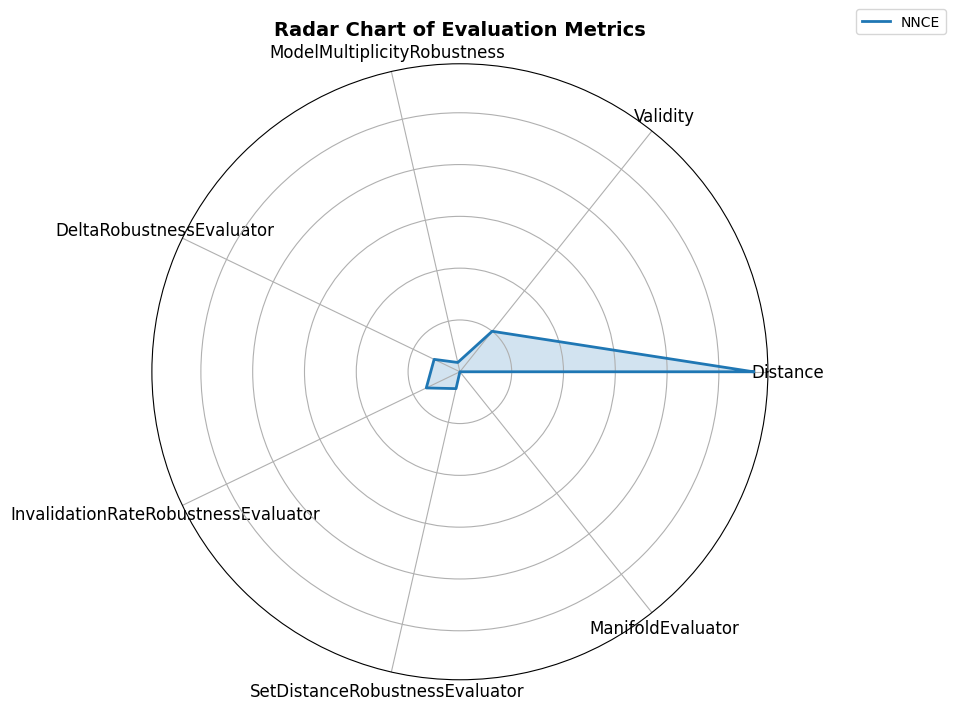

In [44]:
ces = ct.generate(["MCE", "NNCE", "KDTreeNNCE", "Wachter", "RNCE"])
evals = ct.evaluate(visualisation=True)

# Adding Your Own Recourse Method
To add your own recourse method, create the class for your recourse method. Your class should extend RecourseGenerator and implement the `_generation_method` method which generates a counterfactual for a single instance.
You should then call `ct.add_recourse_method(method name, method class)`
You can now use the library to generate counterfactuals with your recourse method and evaluate your recourse method

In [45]:
from rocelib.recourse_methods.RecourseGenerator import RecourseGenerator
import pandas as pd
class MyRecourseMethod(RecourseGenerator):
    def _generation_method(self, instance, column_name="target", neg_value=0, **kwargs):
        ce = pd.DataFrame([[1, 2, 3, 4]], columns=["new_recourse_method_1", "new_recourse_method_2", "new_recourse_method_3", "new_recourse_method_4"])
        return ce
ct.add_recourse_method("my_recourse_method", MyRecourseMethod)
ces = ct.generate(['my_recourse_method'])
print(ces)

Generating for my_recourse_method
{'MCE': [     feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
1    -0.509519        0.0  -1.160313   0.822511  -0.421084   0.975965   
3    -0.518768        0.0  -1.141453   0.825056  -0.412066   0.917835   
5    -0.569852        0.0  -1.094566   0.832347  -0.337701   0.999031   
7    -0.468858        0.0  -1.080736   0.776381  -0.375027   0.953487   
9    -0.567499        0.0  -1.087877   0.810790  -0.362797   0.982336   
..         ...        ...        ...        ...        ...        ...   
242  -0.515732        0.0  -1.110140   0.869393  -0.365333   0.960224   
244  -0.518184        0.0  -1.038810   0.818763  -0.419395   0.970902   
246  -0.551875        0.0  -1.071008   0.832961  -0.333575   0.985159   
250  -0.524899        0.0  -1.061595   0.783294  -0.365203   0.962507   
252  -0.526815        0.0  -1.062826   0.800238  -0.367790   0.960799   

     feature_6  feature_7  feature_8  feature_9  ...  feature_24  feature_25  \


# Adding Your Own Evaluation Metric
To add your own evaluation metric, create the class for your evaluation metric. Your class should extend the Evaluator class and implement the `evaluate` method.
You should then call `ct.add_evaluation_metric(metric name, metric class)`
You can now use the library to evaluate recourse methods with this metric

In [46]:
from rocelib.evaluations.robustness_evaluations.Evaluator import Evaluator
class MyEvaluator(Evaluator):
    def evaluate(self, recourse_method, **kwargs):
        return -1

ct.add_evaluation_metric("my_evaluator", MyEvaluator)
ces = ct.generate(['MCE'])
evals = ct.evaluate(['MCE'], ['my_evaluator'])

Generating for MCE
Evaluation technique my_evaluator
Method: MCE
Shape of CEs for MCE: (125, 34)

Evaluation Results:
+-------------------+----------------+
| Recourse Method   |   my_evaluator |
+===================+================+
| MCE               |             -1 |
+-------------------+----------------+


# Adding Your Own Robustness Evaluation Metric
To add your own evaluation metric, create the class for your evaluation metric. Your class should extend the corresponding evaluator superclass based on the robustness notion:
IC should extend InputChangesRobustnessEvaluator
MC should extend ModelChangesRobustnessEvaluator
NE should extend NoisyExecutionRobustnessEvaluator
MM should extend ModelMultiplicityRobustnessEvaluator
 
Your class should then implement the `evaluate_single_instance` method.
You should then call `ct.add_evaluation_metric(metric name, metric class)`
You can now use the library to evaluate recourse methods with this robustness metric

In [47]:
from rocelib.evaluations.robustness_evaluations.ModelChangesRobustnessEvaluator import ModelChangesRobustnessEvaluator

class NewMCEvaluator(ModelChangesRobustnessEvaluator):
    def evaluate_single_instance(self, instance, counterfactual, **kwargs):
        return True


ct.add_evaluation_metric("my_mc_evaluator", MyEvaluator)
ces = ct.generate(['MCE'])
evals = ct.evaluate(['MCE'], ['my_mc_evaluator'])

Generating for MCE
Evaluation technique my_mc_evaluator
Method: MCE
Shape of CEs for MCE: (125, 34)

Evaluation Results:
+-------------------+-------------------+
| Recourse Method   |   my_mc_evaluator |
+===================+===================+
| MCE               |                -1 |
+-------------------+-------------------+
